# Manufactured solution for the Biot equations of poroelasticity

In this notebook, we perform a convergence analysis for a manufactured solution to the Biot
equations using MPFA/MPSA-FV.

## Background

### The model problem

We consider the standard quasi-static Biot model [[1-3](#References)], posed in a domain
$\Omega \subset \mathbb{R}^2$ with Lipschitz boundary $\partial\Omega$. We are interested in
approximating the solution using MPFA/MPSA-FV [[4](#References)] on a time interval $(0,T)$,
such that

\begin{align}
\nabla \cdot \sigma - \mathbf{f}_s &= 0, \qquad &\mathrm{in}\,\Omega\times (0,T), \\
\sigma - \mu_s \left(\nabla \mathbf{u} + (\nabla \mathbf{u})^\top\right) -  \lambda_s
\left(\nabla \cdot \mathbf{u}\right)\mathbf{I} + \alpha p \mathbf{I} &= 0,
\qquad &\mathrm{in}\,\Omega\times (0,T), \\
S_\phi \frac{\partial p}{\partial t} + \alpha \frac{\partial}{\partial t} \left(\nabla \cdot
\mathbf{u}\right) + \nabla \cdot \mathbf{q} - f_f &= 0,
\qquad &\mathrm{in}\,\Omega\times (0,T), \\
\mathbf{q} + \frac{\mathbf{k}}{\mu_f} \nabla p &= 0,
\qquad &\mathrm{in}\,\Omega\times (0,T), \\
\end{align}

where $\sigma$ is the Biot (total) stress, $\mathbf{f}_s$ are the body forces
(mechanical sources), $\mathbf{u}$ is the displacement, $\lambda_s$ and $\mu_s$ are the usual
Lamé parameters, $p$ is the fluid pressure, $S_\phi$ is the storavitiy, $\alpha$ is the Biot
coefficient, $\mathbf{q}$ is the Darcy's velocity, $\mathbf{k}$ is the intrinsic permeability,
and $\mu_f$ is the dynamic viscosity of the fluid.

The model is complemented with homogeneous Dirichlet boundary conditions

\begin{align}
\mathbf{u} &= 0,  \qquad &\mathrm{on}\,\Gamma_{\mathbf{u}, D}\times (0,T), \\
p &= 0,  \qquad &\mathrm{on}\,\Gamma_{p, D}\times (0,T), \\
\end{align}

for two partitions $\overline{\Gamma}_{\mathbf{u}, D} = \overline{\Gamma}_{p, D} =
\partial\Omega$, and zero initial conditions

\begin{align}
\mathbf{u} &= 0, \qquad &\mathrm{in}\,\Omega\times\{0\}, \\
p &= 0, \qquad &\mathrm{in}\,\Omega\times\{0\}.
\end{align}

### The manufactured solution

Let $\Omega = (0,1)^2$ and $T = 1$. For the sake of simplicity, all physical parameters are
set to one.

Following [[4](#References)], we assume the existence of a smooth displacement solution
given by

\begin{equation}
\mathbf{u}(x,y,t) = t \pmatrix{x (1 - x) \sin{(2 \pi y)} \\ \sin{(2 \pi x)} \sin{(2 \pi y)}},
\end{equation}

and a smooth pressure solution given by

$$
p(x,y,t) = t x (1 - x) \sin{(2 \pi y)}.
$$

The figure from below shows the exact pressure field $p$ and the exact magintude of the
displacement field $\mathbf{u}$ for the final simulation time $T=1$.

<table><tr>
<td> <img src="fig/p.svg" alt="Pressure" style="width: 400px;"/> </td>
<td> <img src="fig/u.svg" alt="Displacement" style="width: 400px;"/> </td>
</tr></table>

Note that the solutions conveniently satisfy both the boundary and initial conditions
imposed above.

Now, exact sources $f_f$ and $\mathbf{f}_s$ can be obtained. Note that this is done in a
separate file (biot_manufactured_exact.py) via the `ExactBiotManufactured` class, exploiting
the capabilities of SymPy.

The resulting source terms are:

\begin{align}
f_f(x,y,t) &= 4\pi^2tx(1-x)\sin(2\pi y) + 2t\sin(2\pi y) + x(1-x)\sin(2\pi y) - x\sin(2\pi y)
+ (1-x)\sin(2\pi y) + 2\pi \sin(2\pi x) \cos(2\pi y), \\
\mathbf{f}_s(x,y,t) &= \pmatrix{
-4\pi^2tx(1-x)\sin(2\pi y) + tx\sin(2\pi y) + tx\sin(2\pi y) - t(1-x)\sin(2\pi y)
- 6 t \sin(2 \pi y) + 8\pi^2t\cos(2\pi x) \cos(2\pi y) \\
-2\pi tx(1-x)\cos(2\pi y) - 4\pi t x \cos(2\pi y) + 4\pi t(1-x)\cos(2\pi y)
- 16\pi^2 t\sin(2\pi x)\sin(2\pi y)
}.
\end{align}

In the figure from below, we show the flow source term $f_s$ and the mechanics source term
$\mathbf{f}_s$ for the final simulation time.

<table><tr>
<td> <img src="fig/ff.svg" alt="Flow source" style="width: 400px;"/> </td>
<td> <img src="fig/fm.svg" alt="Mechanics source" style="width: 400px;"/> </td>
</tr></table>

### The semi-discrete set of equations

We aim at solving the set of equations fully implicitly by applying backward Euler for a single
time step $\tau = 1$. MPFA/MPSA-FV solves the coupled system of equations for
$(p^\mathtt{n}, \mathbf{u}^{\mathtt{n}})$ as the only compound primary unknown. Note that we
use $\mathtt{n}$ to refer to the next time level and $\mathtt{n-1}$ to the previous
time level.

The resulting semi-discrete set of equations is therefore given by:

\begin{align}
\nabla \cdot \left[\mu_s \left(\nabla \mathbf{u}^{\mathtt{n}}
+ \nabla \mathbf{u}^{\mathtt{n}})^\top\right)
+ \lambda_s \left(\nabla \cdot \mathbf{u}^{\mathtt{n}}\right)\mathbf{I}
- \alpha p^{\mathtt{n}} \mathbf{I}\right] - \mathbf{f}_s^{\mathtt{n}} &= 0,
- \qquad &\mathrm{in}\,\Omega\times \{1\}, \\
S_\phi \left(p^\mathtt{n} - p^\mathtt{n-1}\right)
+ \alpha \nabla \cdot \left(\mathbf{u}^\mathtt{n}
- \mathbf{u}^\mathtt{n-1}\right)
- \tau \nabla \cdot \left(\frac{\mathbf{k}}{\mu_f}\nabla p^{\mathtt{n}}\right)
- \tau f_f^\mathtt{n} &= 0, \qquad &\mathrm{in}\,\Omega\times \{1\}.
\end{align}

### References

[1] Biot, M. A. (1941). General theory of three‐dimensional consolidation.
Journal of applied physics, 12(2), 155-164.

[2] Lewis, R. W., Lewis, R. W., & Schrefler, B. A. (1998). The finite element method in the
static and dynamic deformation and consolidation of porous media. John Wiley & Sons.

[3] Coussy, O. (2004). Poromechanics. John Wiley & Sons.

[4] Nordbotten, J. M. (2016). Stable cell-centered finite volume discretization for Biot
equations. SIAM Journal on Numerical Analysis, 54(2), 942-968.

## Importing modules

In [1]:
import porepy as pp
import numpy as np
from time import time

from biot_manufactured_exact import ExactBiotManufactured

## Create model class

Let us now create our own model class, by inhereting from the `ConctactMechanicsBiot` class. 

To properly set up our model, we need to override the methods corresponding to the grid, the
flow source term, and the mechanics source term.

Technically speaking, the source terms are time-dependent. However, in this case, it suffices
to prescribe constant source terms since we are solving for only one time step. This allows us
 to override the `_source_scalar` and `_body_force` prescribing the (integrated) source terms.

In [2]:
class ManufacturedBiot(pp.ContactMechanicsBiot):
    """Class for setting up a manufactured solution for the Biot problem without fractures.

    Attributes:
        exact_sol (ExactBiotManufactured): Exact solution object.

    """

    def __init__(self, exact_sol: ExactBiotManufactured, params: dict):
        """
        Constructor for the ManufacturedBiot class.

        Args:
            exact_sol: Exact solution object, containing the exact source terms.
            params: Model parameters.

        """
        super().__init__(params)
        self.exact_sol = exact_sol

    def create_grid(self) -> None:
        """Create Cartesian structured mixed-dimensional grid."""
        ref_lvl = self.params.get("refinement_level")
        phys_dims = np.array([1, 1])
        n_cells = np.array([2 * 2**ref_lvl, 2 * 2**ref_lvl])
        self.box = pp.geometry.bounding_box.from_points(np.array([[0, 0], phys_dims]).T)
        sd: pp.Grid = pp.CartGrid(n_cells, phys_dims)
        sd.compute_geometry()
        self.mdg = pp.meshing.subdomains_to_mdg([[sd]])

    def _source_scalar(self, sd: pp.Grid) -> np.ndarray:
        """Integrated flow sources."""
        for sd, data in self.mdg.subdomains(return_data=True):
            # Retrieve exact source term
            source_flow = self.exact_sol.eval_scalar(sd, ex.source_flow, model.end_time)
            # Integrated source term
            integrated_source_flow = source_flow * sd.cell_volumes
            # Note that we have to scale the integrated sources with the time step explicitly.
            # This might change when the Assembler class is discontinued, see issue #675
            integrated_source_flow *= self.time_step
            return integrated_source_flow

    def _body_force(self, sd: pp.Grid) -> np.ndarray:
        """Integrated mechanical sources."""
        for sd, data in self.mdg.subdomains(return_data=True):
            # Retrieve exact source term
            body_force = np.asarray(
                self.exact_sol.eval_vector(sd, ex.source_mechanics, model.end_time)
            ).ravel("F")
            # Integrated source term
            integrated_body_force = body_force * sd.cell_volumes.repeat(sd.dim)
            return integrated_body_force

## Run convergence test

In [3]:
# Retrieve exact solution object (this is implemented in a separate class)
# For more details, refer to biot_manufactured_exact.py
ex = ExactBiotManufactured()

# Define refinement levels
refinement_levels = np.array([1, 2, 3, 4, 5])

# Create a dictionary to store the errors
errors = {
    "refinement_levels": refinement_levels,
    "pressure": np.empty(shape=refinement_levels.shape),
    "displacement": np.empty(shape=refinement_levels.shape),
}

# Converge loop
for idx, refinement_level in enumerate(refinement_levels):

    # Define simulation parameters
    params = {
        "time": 0.0,
        "time_step": 1.0,
        "end_time": 1.0,
        "use_ad": True,
        "refinement_level": refinement_level,
    }

    # Instatiate the model class
    model = ManufacturedBiot(ex, params)

    # Run model
    tic = time()
    pp.run_time_dependent_model(model, params)
    print(
        f"Refinement level {refinement_level}. Number of cells {model.mdg.num_subdomain_cells()}."
    )
    print(f"Simulation finished in {time() - tic} seconds.")

    # Retrieve approximated and exact values of primary variables
    mdg = model.mdg
    sd = model.mdg.subdomains(dim=2)[0]
    data = mdg.subdomain_data(sd)
    p_approx = data[pp.STATE][model.scalar_variable]
    u_approx = data[pp.STATE][model.displacement_variable]
    p_exact = ex.eval_scalar(sd, ex.pressure, model.end_time)
    u_exact = np.asarray(ex.eval_vector(sd, ex.displacement, model.end_time)).ravel("F")
    data[pp.STATE]["p_exact"] = p_exact
    data[pp.STATE]["u_exact"] = u_exact

    # Measure error
    error_p = ex.l2_relative_error(sd, p_exact, p_approx, is_cc=True, is_scalar=True)
    error_u = ex.l2_relative_error(sd, u_exact, u_approx, is_cc=True, is_scalar=False)

    # Print summary
    print(f"Pressure error: {error_p}")
    print(f"Displacement error: {error_u}")
    print()

    # Dump errors into dictionary
    errors["pressure"][idx] = error_p
    errors["displacement"][idx] = error_u

# Determine rates of convergence
errors["reduction_p"] = errors["pressure"][:-1] / errors["pressure"][1:]
errors["reduction_u"] = errors["displacement"][:-1] / errors["displacement"][1:]
errors["order_p"] = np.log2(errors["reduction_p"])
errors["order_u"] = np.log2(errors["reduction_u"])

Refinement level 1. Number of cells 16.
Simulation finished in 0.5679240226745605 seconds.
Pressure error: 0.20330983961479535
Displacement error: 0.3955920641364965

Refinement level 2. Number of cells 64.
Simulation finished in 0.25078868865966797 seconds.
Pressure error: 0.04707342586693304
Displacement error: 0.09600761532527154

Refinement level 3. Number of cells 256.
Simulation finished in 0.29462289810180664 seconds.
Pressure error: 0.011596517688515641
Displacement error: 0.02457080231432297

Refinement level 4. Number of cells 1024.
Simulation finished in 0.4825921058654785 seconds.
Pressure error: 0.0028914698407081865
Displacement error: 0.006234630964492454

Refinement level 5. Number of cells 4096.
Simulation finished in 1.4789760112762451 seconds.
Pressure error: 0.000722709266934443
Displacement error: 0.0015665458785560963



## Analysis of results

Let us now plot the approximated displacement and pressure fields

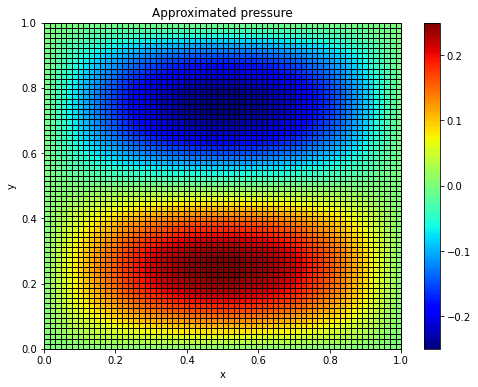

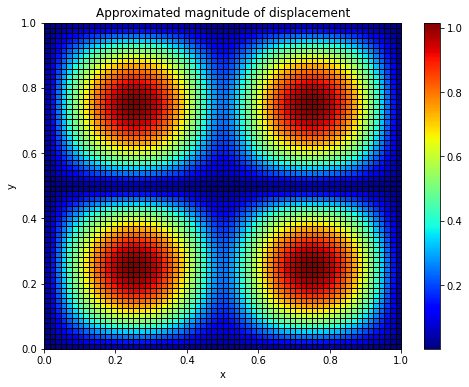

In [4]:
pp.plot_grid(sd, p_approx, plot_2d=True, title="Approximated pressure", figsize=(8, 6))

u_mag = (u_approx[::2] ** 2 + u_approx[1::2] ** 2) ** 0.5
pp.plot_grid(
    sd,
    u_mag,
    plot_2d=True,
    title="Approximated magnitude of displacement",
    figsize=(8, 6),
)

We can now check the convergence order for the primary variables

In [5]:
print(f"Convergence order for the displacement: \n {errors['order_u']}")
print(f"Convergence order for the pressure: \n {errors['order_p']}")

Convergence order for the displacement: 
 [2.04279273 1.96620388 1.97856889 1.99271715]
Convergence order for the pressure: 
 [2.11069528 2.02122121 2.00381668 2.00031576]


## Conclusion

The practical convergence order matches closely the theoretical value of 2, both for the
displacement and the pressure.

One can of course extend this analysis to other types of grids, non-unitary physical
parameters, and non-homogeneous boundary conditions. This, however, is beyond the scope of
this notebook.

## What have we done?

We showed that MPFA/MPSA-FV converges quadratically in space using a manufactured solution on
a fairly simplistic setup.

The approximated solution can be obtained straightforwardly by inhereting from the
`ContactMechanicsBiot` model and then overrding the necessary methods, i.e.,
`create_grid`, `_source_scalar`, and `_body_force`.